In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/home/danial/Data Science/Credit Risk Analysis/data/raw/UCI_Credit_Card.csv'

df = pd.read_csv(file_path)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
pay_status_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

new_features = []

In [6]:
df['fe_bill_sum_6'] = df[bill_cols].sum(axis=1)
df['fe_bill_mean_6'] = df[bill_cols].mean(axis=1)
df['fe_bill_std_6'] = df[bill_cols].std(axis=1)
df['fe_bill_max_6'] = df[bill_cols].max(axis=1)
df['fe_bill_min_6'] = df[bill_cols].min(axis=1)
df['fe_bill_delta_1_6'] = df['BILL_AMT1'] - df['BILL_AMT6']

new_features += ['fe_bill_sum_6','fe_bill_mean_6','fe_bill_std_6','fe_bill_max_6','fe_bill_min_6','fe_bill_delta_1_6']

df[['fe_bill_sum_6','fe_bill_mean_6','fe_bill_std_6','fe_bill_delta_1_6']].head()


,fe_bill_sum_6,fe_bill_mean_6,fe_bill_std_6,fe_bill_delta_1_6
0,7704.0,1284.000000,1761.633219,3913.0
1,17077.0,2846.166667,637.967841,-579.0
2,101653.0,16942.166667,6064.518593,13690.0
3,231334.0,38555.666667,10565.793518,17443.0
4,109339.0,18223.166667,10668.590074,-10514.0


In [7]:
df['fe_pay_sum_6'] = df[pay_amt_cols].sum(axis=1)
df['fe_pay_mean_6'] = df[pay_amt_cols].mean(axis=1)
df['fe_pay_std_6'] = df[pay_amt_cols].std(axis=1)
df['fe_pay_max_6'] = df[pay_amt_cols].max(axis=1)
df['fe_pay_min_6'] = df[pay_amt_cols].min(axis=1)
df['fe_pay_delta_1_6'] = df['PAY_AMT1'] - df['PAY_AMT6']

new_features += ['fe_pay_sum_6','fe_pay_mean_6','fe_pay_std_6','fe_pay_max_6','fe_pay_min_6','fe_pay_delta_1_6']

df[['fe_pay_sum_6','fe_pay_mean_6','fe_pay_std_6','fe_pay_delta_1_6']].head()


,fe_pay_sum_6,fe_pay_mean_6,fe_pay_std_6,fe_pay_delta_1_6
0,689.0,114.833333,281.283072,0.0
1,5000.0,833.333333,752.772653,-2000.0
2,11018.0,1836.333333,1569.815488,-3482.0
3,8388.0,1398.000000,478.058155,1000.0
4,59049.0,9841.500000,13786.230736,1321.0


In [8]:
df['fe_utilization_latest'] = np.where(df['LIMIT_BAL']>0, df['BILL_AMT1']/df['LIMIT_BAL'], 0.0)
df['fe_utilization_mean'] = np.where(df['LIMIT_BAL']>0, df['fe_bill_mean_6']/df['LIMIT_BAL'], 0.0)
df['fe_pay_to_bill_ratio_latest'] = np.where(df['BILL_AMT1']>0, df['PAY_AMT1']/df['BILL_AMT1'], 0.0)
df['fe_pay_to_bill_ratio_6'] = np.where(df['fe_bill_sum_6']>0, df['fe_pay_sum_6']/df['fe_bill_sum_6'], 0.0)

new_features += ['fe_utilization_latest','fe_utilization_mean','fe_pay_to_bill_ratio_latest','fe_pay_to_bill_ratio_6']

df[['fe_utilization_latest','fe_pay_to_bill_ratio_latest','fe_pay_to_bill_ratio_6']].head()


,fe_utilization_latest,fe_pay_to_bill_ratio_latest,fe_pay_to_bill_ratio_6
0,0.195650,0.000000,0.089434
1,0.022350,0.000000,0.292791
2,0.324878,0.051917,0.108388
3,0.939800,0.042562,0.036259
4,0.172340,0.232099,0.540054


In [9]:
df['fe_num_delayed_months'] = (df[pay_status_cols] > 0).sum(axis=1)
df['fe_max_delay'] = df[pay_status_cols].max(axis=1)
df['fe_recent_delay'] = df['PAY_0']

new_features += ['fe_num_delayed_months','fe_max_delay','fe_recent_delay']

df[['fe_num_delayed_months','fe_max_delay','fe_recent_delay']].head()


,fe_num_delayed_months,fe_max_delay,fe_recent_delay
0,2,2,2
1,2,2,-1
2,0,0,0
3,0,0,0
4,0,0,-1


In [10]:
df['fe_underpaid_last_month'] = ((df['BILL_AMT1']>0) & (df['PAY_AMT1']<df['BILL_AMT1'])).astype(int)
df['fe_high_utilization_flag'] = (df['fe_utilization_latest'] > 0.8).astype(int)

new_features += ['fe_underpaid_last_month','fe_high_utilization_flag']

df[['fe_underpaid_last_month','fe_high_utilization_flag']].head()


,fe_underpaid_last_month,fe_high_utilization_flag
0,1,0
1,1,0
2,1,0
3,1,1
4,1,0


In [11]:
len(new_features), new_features, df[new_features].head()


(33,
 ['fe_bill_sum_6',
  'fe_bill_mean_6',
  'fe_bill_std_6',
  'fe_bill_max_6',
  'fe_bill_min_6',
  'fe_bill_delta_1_6',
  'fe_pay_sum_6',
  'fe_pay_mean_6',
  'fe_pay_std_6',
  'fe_pay_max_6',
  'fe_pay_min_6',
  'fe_pay_delta_1_6',
  'fe_bill_sum_6',
  'fe_bill_mean_6',
  'fe_bill_std_6',
  'fe_bill_max_6',
  'fe_bill_min_6',
  'fe_bill_delta_1_6',
  'fe_pay_sum_6',
  'fe_pay_mean_6',
  'fe_pay_std_6',
  'fe_pay_max_6',
  'fe_pay_min_6',
  'fe_pay_delta_1_6',
  'fe_utilization_latest',
  'fe_utilization_mean',
  'fe_pay_to_bill_ratio_latest',
  'fe_pay_to_bill_ratio_6',
  'fe_num_delayed_months',
  'fe_max_delay',
  'fe_recent_delay',
  'fe_underpaid_last_month',
  'fe_high_utilization_flag'],
    fe_bill_sum_6  fe_bill_mean_6  fe_bill_std_6  fe_bill_max_6  fe_bill_min_6  \
 0         7704.0     1284.000000    1761.633219         3913.0            0.0   
 1        17077.0     2846.166667     637.967841         3455.0         1725.0   
 2       101653.0    16942.166667    6064.5185

In [17]:

corr_target = df[new_features].corrwith(df['default.payment.next.month'])
corr_target_sorted = corr_target.abs().sort_values(ascending=False) 

corr_target_sorted.head(10)  


fe_num_delayed_months    0.398394
fe_max_delay             0.331036
fe_recent_delay          0.324794
fe_pay_min_6             0.131593
fe_pay_min_6             0.131593
fe_utilization_mean      0.115483
fe_pay_mean_6            0.102354
fe_pay_mean_6            0.102354
fe_pay_sum_6             0.102354
fe_pay_sum_6             0.102354
dtype: float64

In [18]:

new_features_unique = list(dict.fromkeys(new_features))


corr_matrix = df[new_features_unique].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


high_corr_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.9)]
high_corr_features


['fe_bill_mean_6',
 'fe_bill_max_6',
 'fe_bill_min_6',
 'fe_pay_mean_6',
 'fe_pay_max_6',
 'fe_utilization_mean']

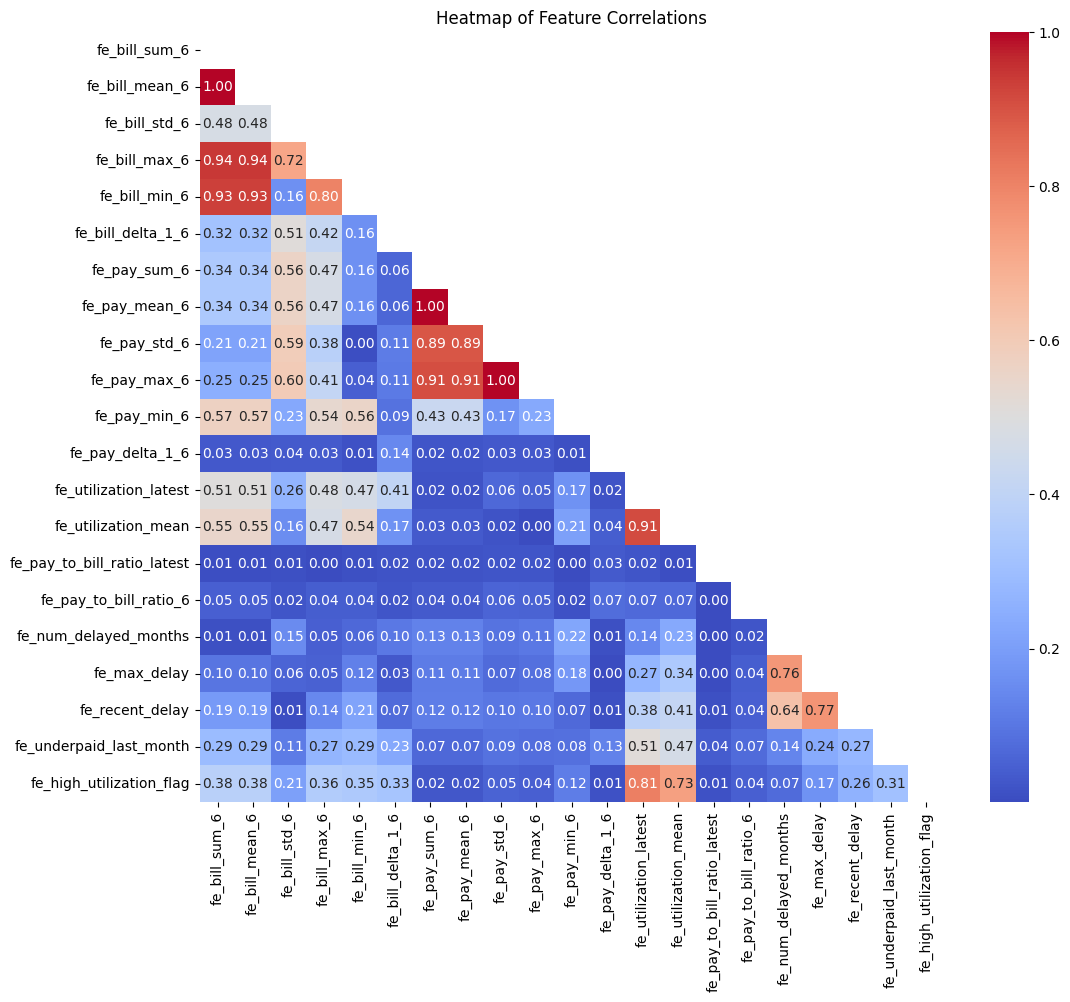

In [19]:



new_features_unique = list(dict.fromkeys(new_features))


corr_matrix = df[new_features_unique].corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Feature Correlations")
plt.show()
